In [23]:
from src import ML_Backend
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [5]:
# Setting up the backend for training
mlbackend = ML_Backend.ML_Backend(training=True, model_Types = ["RandomForestRegressor", "DecisionTreeRegressor", "XGBRegressor"], dataSetName = "HousePrice", dataSetFilePath="data/cleaned_train.csv")

Loading Data Set Successful.
No of rows: 1916
No. of columns: 9

         id  Extracted Price  Extracted Bedrooms  Extracted area  \
0  20193203             5500                 NaN             0.0   
1  20193239             4000                 NaN             0.0   
2  20193399             6000                 NaN             0.0   
3  20190433            16000                 NaN             0.0   
4  20190513             3600                 NaN            45.0   

   Extracted Bathrooms Extracted Area_JHB Extracted listing agency  \
0                  0.0               None                     None   
1                  0.0               None                     None   
2                  0.0               None                     None   
3                  0.0               None                     None   
4                  0.0               None                     None   

  Extracted Type Extracted Available Month  
0           None                      None  
1           Non

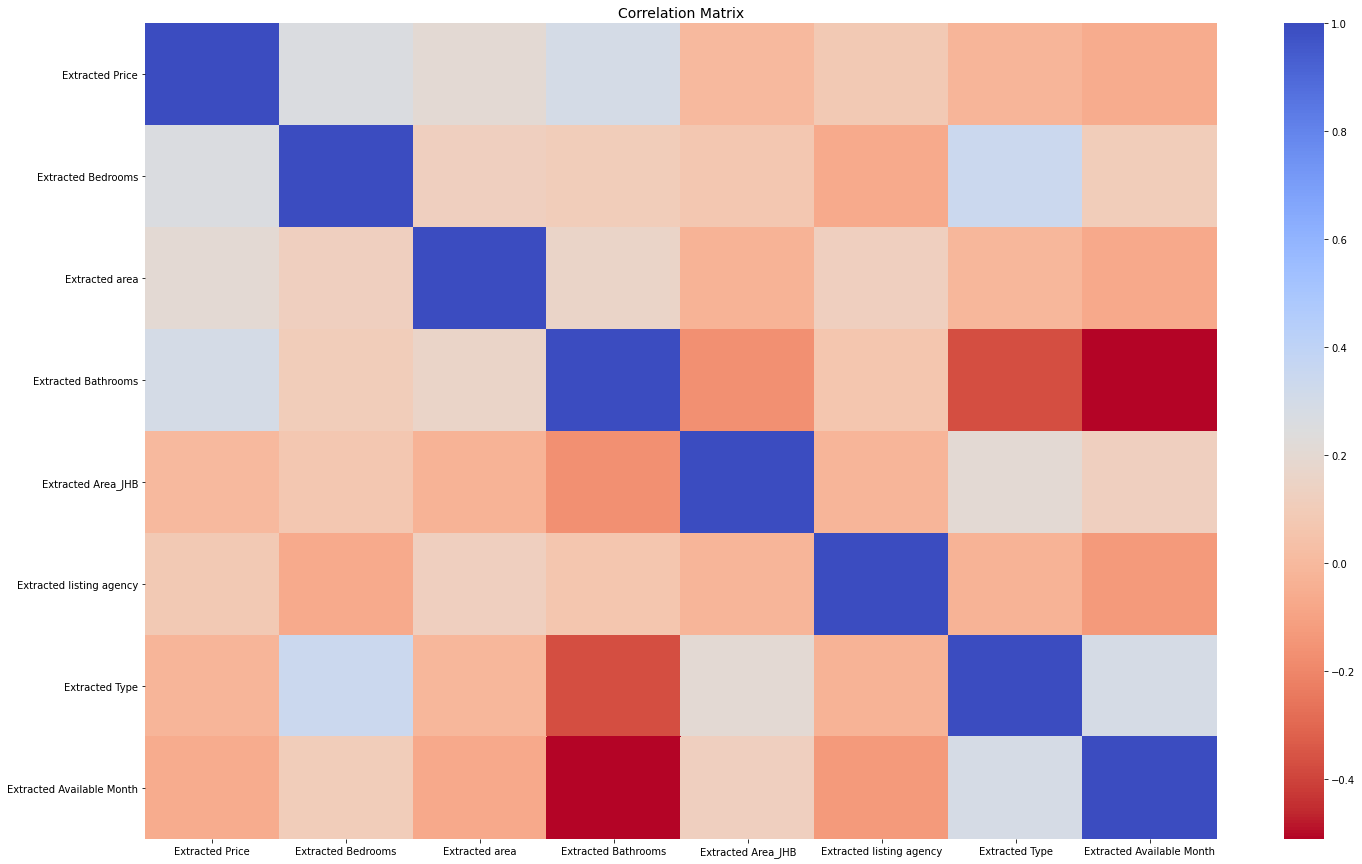

Prepping data set
Data set prepped
Training RandomForestRegressor model
RandomForestRegressor model has been fit
RandomForestRegressor has been saved
Training DecisionTreeRegressor model
DecisionTreeRegressor model has been fit
DecisionTreeRegressor has been saved
Training XGBRegressor model
XGBRegressor model has been fit
XGBRegressor has been saved
Testing models

The Best Hyperparameters for the RandomForestRegressor model was:
{'bootstrap': True, 'criterion': 'mse', 'n_estimators': 100} and the best neg_mean_squared_error was -3913.4374034652387
Overall accuracy for RandomForestRegressor is 0.0

The total validation records are 479, and 0 were correct

The validation Mean Absolute Error score is: 7283.3481772429805

The Best Hyperparameters for the DecisionTreeRegressor model was:
{'criterion': 'mse', 'max_depth': 1000, 'splitter': 'random'} and the best neg_mean_squared_error was -4515.869645892119
Overall accuracy for DecisionTreeRegressor is 6.471816283924843

The total validati

In [6]:
# Executing all steps in training, see ML_Backend.py, execute model for details
mlbackend.execute_Model(histogram=False, columnwise=False, target="Extracted Price",dropColumns=["id"], autoFS=False)

In [ ]:
# Setting up backend for prediction
mlbackend = ML_Backend.ML_Backend(training="predict", model_Types = ["RandomForestRegressor", "DecisionTreeRegressor", "XGBRegressor"], dataSetName = "HousePrice", dataSetFilePath="data/cleaned_test.csv")



In [ ]:
# Generating predictions
mlbackend.execute_Model(histogram=False, columnwise=False, target="Extracted Price",dropColumns=["id"], autoFS=False)

349


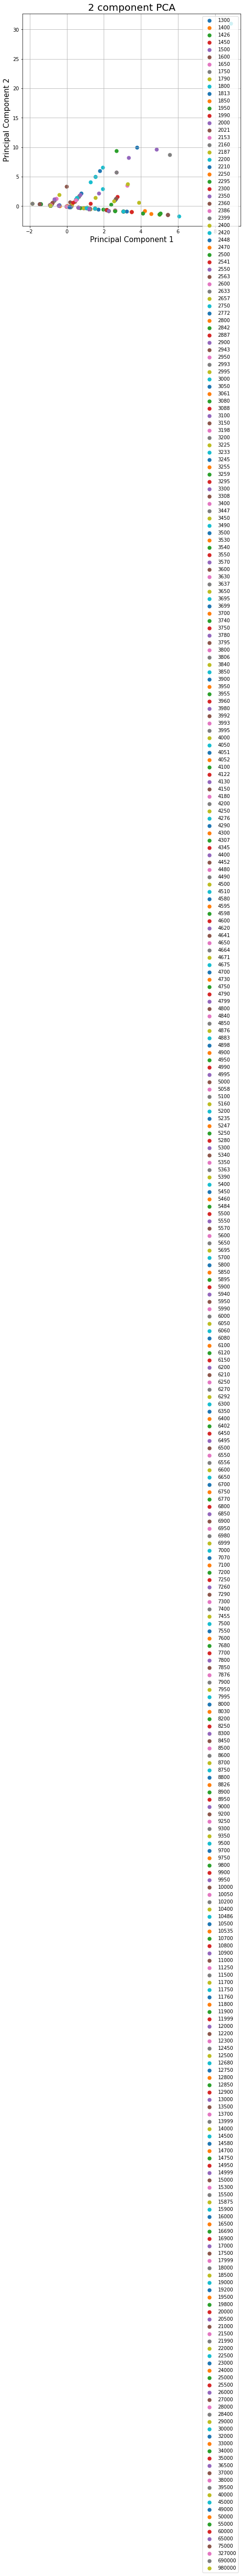

In [34]:
# PCA

df = pd.read_csv("data/cleaned_train.csv")


y = df["Extracted Price"]

x = df.drop(["id", "Extracted Price", 'Extracted Area_JHB', 'Extracted listing agency',
       'Extracted Type', 'Extracted Available Month'], axis=1)

for i in x.columns:
    x.loc[x[i].isnull(), i]= x[i].mean()    

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Extracted Price']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = y.sort_values().unique()
print(len(targets))
colors = ['r', 'g', 'b']
for target in targets:
    indicesToKeep = finalDf['Extracted Price'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()
